In [24]:
from nela_features.nela_features import NELAFeatureExtractor
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm
from sklearn import metrics

nela = NELAFeatureExtractor()

# Extract all feature groups at once
feature_vector= nela.extract_all(newsarticle)
print(feature_vector[0])


[0.0, 0.0, 0.058823529411764705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13333333333333333, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9333333333333333, 5.066666666666666, 15, -2.6836, 3.0, 12.0427, 41.66666666666667, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [19]:
# import nltk
# nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
# nltk.download('words')

[nltk_data] Downloading package words to /home/yash/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [34]:
df = pd.read_csv('sample20k.csv')
df = df[['body','label']]
df = df[pd.notnull(df['body'])]

n = df.shape
print(n)

df.index = range(n[0])
X  = df['body']
Y = df['label']
X_X = []
Y_Y = []
# for x in X:
#     print(x)
for x in df.index:
#     print(df['body'][x],df['label'][x])
#     break
    try:
        X_X.append(nela.extract_all(df['body'][x])[0])
        Y_Y.append(df['label'][x])
    except:
        pass
# X = X.apply(lambda x: nela.extract_all(x)[0])
X_train, X_test , Y_train, Y_test = train_test_split(X_X, Y_Y , test_size = 0.20)

(20000, 2)


/usr/lib/python3/dist-packages/dateutil/parser/_parser.py:1199: UnknownTimezoneWarning: tzname AT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/lib/python3/dist-packages/dateutil/parser/_parser.py:1199: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/lib/python3/dist-packages/dateutil/parser/_parser.py:1199: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/lib/pyth

In [49]:
sss = df[['body','label']]
sss

,body,label
0,This cabinet Boris Johnson has put together is...,0.0
1,According to a recent joint FBI and Department...,2.0
2,"In April 2018, I was given the sack, after a c...",0.0
3,Every parent knows the difference a year makes...,2.0
4,The troubles facing the Supreme Horse Racing C...,0.0
...,...,...
19995,The Illinois House on Thursday cleared a measu...,0.0
19996,"Polar bears are out, and pictures of people in...",2.0
19997,It looks like the Clintons continue to spend w...,2.0
19998,It is like a scene from a horror film. As a ca...,0.0


In [37]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        print(j,i,cm[i,j])
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.777
Confusion matrix, without normalization
0 0 3102
1 0 1
0 1 891
1 1 1
1


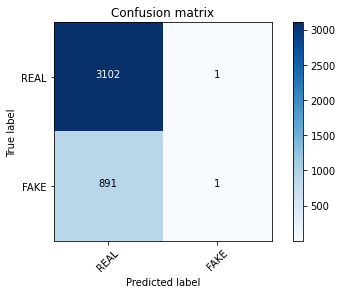

In [43]:
#SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])
k=0
for i in range(len(pred)):
    if(Y_test[i]==0 and pred[i]==2):
        k+=1
print(k)

/home/yash/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:   0.779
Confusion matrix, without normalization
0 0 3089
1 0 14
0 1 868
1 1 24


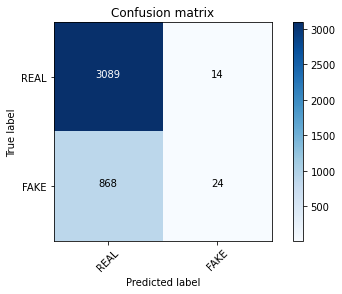

In [44]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['REAL', 'FAKE'])